## Import libraries

In [1]:
# improving code readability and reducing distractions
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import time
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_recall_fscore_support
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import RidgeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import lightgbm as lgb
import xgboost as xgb
from xgboost import plot_importance

In [3]:
# Mounting google drive in colab notebook || run only one time
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Reading the dataset
df = pd.read_csv('/content/drive/MyDrive/CICIDS2017_sample.csv')

In [5]:
# On executing df command, the notebook will display the DataFrame's contents
df

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,4,2,0,37,0,31,6,18.500000,17.677670,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,142377,46,62,1325,105855,570,0,28.804348,111.407285,4344,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,118873,23,28,1169,45025,570,0,50.826087,156.137367,2896,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,143577,43,55,1301,107289,570,0,30.255814,115.178969,4344,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,143745,49,59,1331,110185,570,0,27.163265,108.067176,4344,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56656,234,2,2,64,232,32,32,32.000000,0.000000,116,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
56657,133288,2,2,94,482,47,47,47.000000,0.000000,241,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
56658,11507694,5,4,450,3525,450,0,90.000000,201.246118,3525,...,32,893.0,0.0,893,893,6503640.0,0.0,6503640,6503640,DoS
56659,11507707,8,6,416,11632,416,0,52.000000,147.078211,5792,...,32,897.0,0.0,897,897,6503122.0,0.0,6503122,6503122,DoS


In [6]:
# Here we are asking Pandas to count how many times each unique value appears in the 'Label' column in the dataframe.
df.Label.value_counts()

BENIGN          22731
DoS             19035
PortScan         7946
BruteForce       2767
WebAttack        2180
Bot              1966
Infiltration       36
Name: Label, dtype: int64

### Data sampling
Due to the space limit of GitHub files, we sample a small-sized subset for model learning using random sampling.
Original data have approx 3 lakh entries so they do sampling and we get a file of name CICIDS2017_sample.csv with 56661 rows.


Data sampling is a process used in statistics and data analysis to select a subset or portion of a larger dataset for the purpose of analysis.
Random sampling involves selecting data points from the population in a way that each data point has an equal and independent chance of being chosen. It helps ensure that the sample is representative of the population.

In [7]:
# Shortening the data on the basis of fractions of class
df_minor = df[(df['Label']=='WebAttack')|(df['Label']=='Bot')|(df['Label']=='Infiltration')]
df_BENIGN = df[(df['Label']=='BENIGN')]
df_BENIGN = df_BENIGN.sample(n=None, frac=0.01, replace=False, weights=None, random_state=None, axis=0)
df_DoS = df[(df['Label']=='DoS')]
df_DoS = df_DoS.sample(n=None, frac=0.05, replace=False, weights=None, random_state=None, axis=0)
df_PortScan = df[(df['Label']=='PortScan')]
df_PortScan = df_PortScan.sample(n=None, frac=0.05, replace=False, weights=None, random_state=None, axis=0)
df_BruteForce = df[(df['Label']=='BruteForce')]
df_BruteForce = df_BruteForce.sample(n=None, frac=0.2, replace=False, weights=None, random_state=None, axis=0)

In [8]:
# The provided code is used to combine several DataFrames (df_BENIGN, df_DoS, df_PortScan, df_BruteForce, and df_minor) into a single DataFrame called df_s.
df_s = df_BENIGN.append(df_DoS).append(df_PortScan).append(df_BruteForce).append(df_minor)

In [9]:
df_s


,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
55172,645,2,2,472,2668,236,236,236.000000,0.000000,1334,...,20,0.0,0.000000,0,0,0.0,0.000000,0,0,BENIGN
21366,118259739,41,63,1128,75608,230,0,27.512195,52.392806,2860,...,20,331282.0,345680.463692,575715,86849,58751779.5,256984.524593,58933495,58570064,BENIGN
52761,119039,1,1,47,154,47,47,47.000000,0.000000,154,...,32,0.0,0.000000,0,0,0.0,0.000000,0,0,BENIGN
34759,3572,2,1,23,0,23,0,11.500000,16.263456,0,...,20,0.0,0.000000,0,0,0.0,0.000000,0,0,BENIGN
27831,104,2,2,4,12,2,2,2.000000,0.000000,6,...,24,0.0,0.000000,0,0,0.0,0.000000,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31732,5005388,5,3,599,2021,599,0,119.800000,267.880944,2021,...,32,0.0,0.000000,0,0,0.0,0.000000,0,0,WebAttack
31735,5016759,5,5,599,4149,599,0,119.800000,267.880944,2701,...,32,0.0,0.000000,0,0,0.0,0.000000,0,0,WebAttack
31738,5009163,4,4,599,2021,599,0,149.750000,299.500000,2021,...,32,0.0,0.000000,0,0,0.0,0.000000,0,0,WebAttack
31739,73,1,1,0,0,0,0,0.000000,0.000000,0,...,32,0.0,0.000000,0,0,0.0,0.000000,0,0,WebAttack


In [10]:
df_s = df_s.sort_index()

# if you want to sort in decreasing order use the following comand
# df_s = df_s.sort_index(ascending=False)

In [11]:
# Save the generated data (shorten data) in a new csv file in drive
df_s.to_csv('/content/drive/MyDrive/CICIDS2017_mod.csv',index=0)

### Preprocessing (normalization and padding values)

In [12]:
df = pd.read_csv('/content/drive/MyDrive/CICIDS2017_mod.csv')

### MIN-MAX Normalization
Min-Max scaling, also known as feature scaling or min-max normalization, is a data preprocessing technique used in machine learning and data analysis to scale numerical features in a dataset to a specific range, typically [0, 1].

Scaled Value = (Value - Min) / (Max - Min)

Here, "Value" is the original value, "Min" is the minimum value of the feature, and "Max" is the maximum value of the feature. The result, the scaled value, will fall within the specified range ([0, 1] in most cases).

In [13]:
# Min-max normalization
numeric_features = df.dtypes[df.dtypes != 'object'].index
df[numeric_features] = df[numeric_features].apply(
    lambda x: (x - x.min()) / (x.max()-x.min()))
# Below code replaces any missing or NaN (Not-a-Number) values in the DataFrame with the value 0.
# Filling missing values with 0 is a common approach when you want to handle or remove the impact of missing data on subsequent calculations or modeling.
df = df.fillna(0)

### Split train_set and test_set

In [14]:
# The LabelEncoder is used to convert categorical labels (in this case, the "Label" column) into numerical labels.
# It assigns a unique integer to each category in the label column.
labelencoder = LabelEncoder()
# This line is using the LabelEncoder to transform the values in the last column of the DataFrame df.
# It takes the labels in the "Label" column (the -1 index refers to the last column), converts them to numerical labels
df.iloc[:, -1] = labelencoder.fit_transform(df.iloc[:, -1])

# We can check the label encoding by executing the following snippet
# To obtain the mapping of encoded labels to original labels
##label_mapping = dict(zip(labelencoder.transform(labelencoder.classes_), labelencoder.classes_))
# for Print the mapping
##print(label_mapping)

# This line creates the feature matrix X by dropping the "Label" column from the DataFrame and converting the remaining data into a NumPy array.
# We can see the X by executing print(X) also for y.
X = df.drop(['Label'],axis=1).values
# Here, we're creating the target vector y. It takes the transformed numerical labels (the last column) from the DataFrame and reshapes it into a 2D array,
y = df.iloc[:, -1].values.reshape(-1,1)
# This line further reshapes the y array to be a 1D array. (Step sometimes necessary for specific machine learning algorithms that expect the target to be a 1D array.)
y=np.ravel(y)
# X_train contains 80% of your feature data for training.
# X_test contains 20% of your feature data for testing.
# y_train contains the corresponding target labels for the training set.
# y_test contains the corresponding target labels for the test set
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, test_size = 0.2, random_state = 0,stratify = y)

In [15]:
# X_train.shape command allows you to check the dimensions or shape of the X_train NumPy array.
# The shape of an array is given in the form (n_samples, n_features), where:
# n_samples is the number of data points or samples in the array.
# n_features is the number of features (columns) in the array.

print(X_train.shape)
print(X_test.shape)

(5048, 77)
(1263, 77)


In [16]:
# pd.Series(y_train).value_counts() -- to compute the count of unique values in the y_train array and present the result as a Pandas Series.
# y_train: This is your training set's target variable, which typically contains the labels or classes that you want to count.
# pd.Series(): This part converts the y_train array into a Pandas Series (1D array-like data structure).
# .value_counts(): This method, when applied to a Pandas Series, counts the occurrences of unique values in that Series and returns the counts as a new Series.

pd.Series(y_train).value_counts()

6    1744
1    1573
3     761
2     442
5     317
0     182
4      29
dtype: int64

### Oversampling by SMOTE (Synthetic Minority Over-sampling Technique)

In [17]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(n_jobs=-1,sampling_strategy={4:1500}) # Create 1500 samples for the minority class "4"

In [18]:
X_train, y_train = smote.fit_resample(X_train, y_train)

In [19]:
pd.Series(y_train).value_counts()

6    1744
1    1573
4    1500
3     761
2     442
5     317
0     182
dtype: int64

In [20]:
# After sampling checking the dimension of training and testing dataset
print(X_train.shape)
print(X_test.shape)

(6519, 77)
(1263, 77)


## Machine learning model training

Accuracy of AdaBoost: 0.5803642121931908
Precision of AdaBoost: 0.5907302280560645
Recall of AdaBoost: 0.5803642121931908
F1-score of AdaBoost: 0.5567987092410187
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        45
           1       0.61      0.42      0.50       393
           2       0.00      0.00      0.00       111
           3       0.37      0.99      0.54       191
           4       1.00      0.57      0.73         7
           5       0.00      0.00      0.00        80
           6       0.98      0.86      0.92       436

    accuracy                           0.58      1263
   macro avg       0.42      0.41      0.38      1263
weighted avg       0.59      0.58      0.56      1263



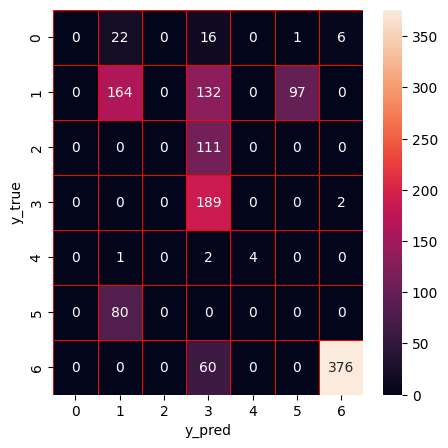


Training Time: 0.30 seconds		Prediction Time: 0.0062 seconds		Testing Time: 0.45 seconds


In [21]:
# Start recording training time
start_time = time.time()

# Creating an AdaBoostClassifier with 10 base estimators
adaboost = AdaBoostClassifier(n_estimators=10)

# Instructing AdaBoost model to learn from the provided training data
adaboost.fit(X_train, y_train)

# Stop recording training time
end_time = time.time()

# Calculating the training time in seconds
training_time = end_time - start_time

#-----------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Start recording testing time
start_time = time.time()

# Calculating accuracy of AdaBoost Classifier
adaboost_score = adaboost.score(X_test, y_test)

# Use the trained AdaBoost Classifier to make predictions on the test data (X_test), and the predictions are stored in the y_predict_adaboost variable.
# Simultaneouly Calculating prediction time
# Start recording prediction time
start_time = time.time()
y_predict_adaboost = adaboost.predict(X_test)
# Stop recording training time
end_time = time.time()
# Calculating the prediction time in seconds
prediction_time = end_time - start_time

# Copying y_test in y_true_adaboost variable for comparison and evaluation purposes.
y_true_adaboost = y_test

# Calculating several important classification evaluation metrics, including precision, recall, F1-score, and support.
precision_adaboost, recall_adaboost, fscore_adaboost, support_adaboost = precision_recall_fscore_support(y_true_adaboost, y_predict_adaboost, average='weighted')

print('Accuracy of AdaBoost: ' + str(adaboost_score))
print('Precision of AdaBoost: ' + str(precision_adaboost))
print('Recall of AdaBoost: ' + str(recall_adaboost))
print('F1-score of AdaBoost: ' + str(fscore_adaboost))
print(classification_report(y_true_adaboost, y_predict_adaboost))

# This snippet of code is used to create a heatmap of a confusion matrix
cm_adaboost = confusion_matrix(y_true_adaboost, y_predict_adaboost)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm_adaboost, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

# Stop recording testing time
end_time = time.time()

# Calculating the testing time in seconds
testing_time = end_time - start_time

print()
print(f"Training Time: {training_time:.2f} seconds\t\tPrediction Time: {prediction_time:.4f} seconds\t\tTesting Time: {testing_time:.2f} seconds")


Accuracy of Decision tree: 0.9889152810768013
Precision of Decision tree: 0.9891206805848524
Recall of Decision tree: 0.9889152810768013
F1-score of Decision tree: 0.988944514719478
              precision    recall  f1-score   support

           0       0.85      0.91      0.88        45
           1       1.00      0.99      1.00       393
           2       1.00      1.00      1.00       111
           3       0.99      0.97      0.98       191
           4       0.83      0.71      0.77         7
           5       0.99      0.99      0.99        80
           6       0.99      1.00      1.00       436

    accuracy                           0.99      1263
   macro avg       0.95      0.94      0.94      1263
weighted avg       0.99      0.99      0.99      1263



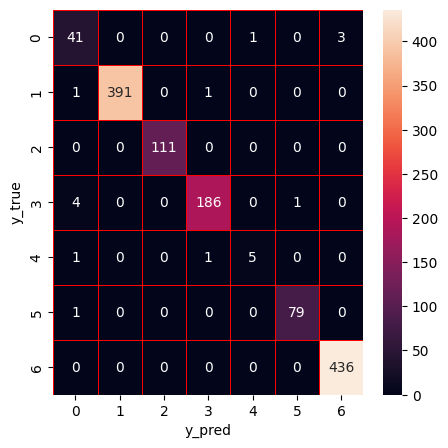


Training Time: 0.13 seconds		Prediction Time: 0.0005 seconds		Testing Time: 0.46 seconds


In [22]:
# Start recording training time
start_time = time.time()

# Training Decision tree
dt = DecisionTreeClassifier(random_state = 0)

# instructing Decision tree model to learn from the provided training data
dt.fit(X_train, y_train)

# Stop recording training time
end_time = time.time()

# Calculating the training time in seconds
training_time = end_time - start_time

#-----------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Start recording testing time
start_time = time.time()

# Calculating accuracy of Decision tree
dt_score = dt.score(X_test, y_test)

# Using the trained Decision tree to make predictions on the test data (X_test), and the predictions are stored in the y_predict_dt variable.
# Simultaneouly Calculating prediction time
# Start recording prediction time
start_time = time.time()
y_predict_dt = dt.predict(X_test)
# Stop recording training time
end_time = time.time()
# Calculating the prediction time in seconds
prediction_time = end_time - start_time

# Copying y_test in y_true_dt variable for comparison and evaluation purposes.
y_true_dt = y_test

# Calculating several important classification evaluation metrics, including precision, recall, F1-score, and support.
precision_dt, recall_dt, fscore_dt, support_dt = precision_recall_fscore_support(y_true_dt, y_predict_dt, average='weighted')

print('Accuracy of Decision tree: ' + str(dt_score))
print('Precision of Decision tree: ' + str(precision_dt))
print('Recall of Decision tree: ' + str(recall_dt))
print('F1-score of Decision tree: ' + str(fscore_dt))
print(classification_report(y_true_dt, y_predict_dt))

# This snippet of code is used to create a heatmap of a confusion matrix
cm_dt = confusion_matrix(y_true_dt, y_predict_dt)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm_dt, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

# Stop recording testing time
end_time = time.time()

# Calculating the testing time in seconds
testing_time = end_time - start_time

print()
print(f"Training Time: {training_time:.2f} seconds\t\tPrediction Time: {prediction_time:.4f} seconds\t\tTesting Time: {testing_time:.2f} seconds")


Accuracy of Extra trees: 0.9865399841646872
Precision of Extra trees: 0.9863635683490545
Recall of Extra trees: 0.9865399841646872
F1-score of Extra trees: 0.9863917240942426
              precision    recall  f1-score   support

           0       0.88      0.82      0.85        45
           1       0.99      0.99      0.99       393
           2       0.96      0.99      0.98       111
           3       1.00      0.99      0.99       191
           4       0.86      0.86      0.86         7
           5       1.00      1.00      1.00        80
           6       0.99      1.00      0.99       436

    accuracy                           0.99      1263
   macro avg       0.96      0.95      0.95      1263
weighted avg       0.99      0.99      0.99      1263



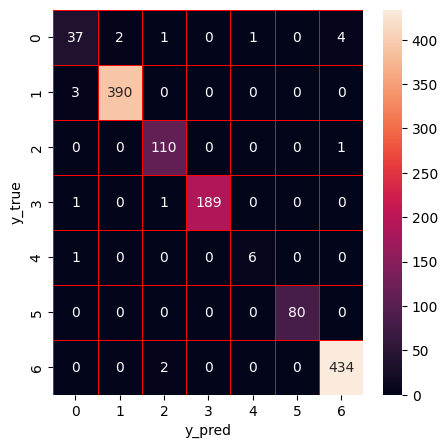


Training Time: 0.47 seconds		Prediction Time: 0.0281 seconds		Testing Time: 0.41 seconds


In [23]:
# Start recording training time
start_time = time.time()

# Training Extra trees
et = ExtraTreesClassifier(random_state = 0)

# Instructing Extra trees model to learn from the provided training data
et.fit(X_train, y_train)

# Stop recording training time
end_time = time.time()

# Calculating the training time in seconds
training_time = end_time - start_time

#-----------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Start recording testing time
start_time = time.time()

# Calculating accuracy of Extra trees
et_score = et.score(X_test, y_test)

# Use the trained Extra trees to make predictions on the test data (X_test), and the predictions are stored in the y_predict_et variable.
# Simultaneouly Calculating prediction time
# Start recording prediction time
start_time = time.time()
y_predict_et = et.predict(X_test)
# Stop recording training time
end_time = time.time()
# Calculating the prediction time in seconds
prediction_time = end_time - start_time

# Copying y_test in y_true_et variable for comparison and evaluation purposes.
y_true_et = y_test

# Calculating several important classification evaluation metrics, including precision, recall, F1-score, and support.
precision_et, recall_et, fscore_et, support_et = precision_recall_fscore_support(y_true_et, y_predict_et, average='weighted')

print('Accuracy of Extra trees: ' + str(et_score))
print('Precision of Extra trees: ' + str(precision_et))
print('Recall of Extra trees: ' + str(recall_et))
print('F1-score of Extra trees: ' + str(fscore_et))
print(classification_report(y_true_et, y_predict_et))

# This snippet of code is used to create a heatmap of a confusion matrix
cm_et = confusion_matrix(y_true_et, y_predict_et)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm_et, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

# Stop recording testing time
end_time = time.time()

# Calculating the testing time in seconds
testing_time = end_time - start_time

print()
print(f"Training Time: {training_time:.2f} seconds\t\tPrediction Time: {prediction_time:.4f} seconds\t\tTesting Time: {testing_time:.2f} seconds")


Accuracy of Gaussian Naive Bayes classifier: 0.9113222486144101
Precision of Gaussian Naive Bayes classifier: 0.9204526227288776
Recall of Gaussian Naive Bayes classifier: 0.9113222486144101
F1-score of Gaussian Naive Bayes classifier: 0.9123904026706693
              precision    recall  f1-score   support

           0       0.83      0.64      0.73        45
           1       0.92      0.99      0.96       393
           2       0.64      0.84      0.73       111
           3       0.98      0.82      0.89       191
           4       1.00      0.71      0.83         7
           5       1.00      1.00      1.00        80
           6       0.96      0.91      0.93       436

    accuracy                           0.91      1263
   macro avg       0.90      0.85      0.87      1263
weighted avg       0.92      0.91      0.91      1263



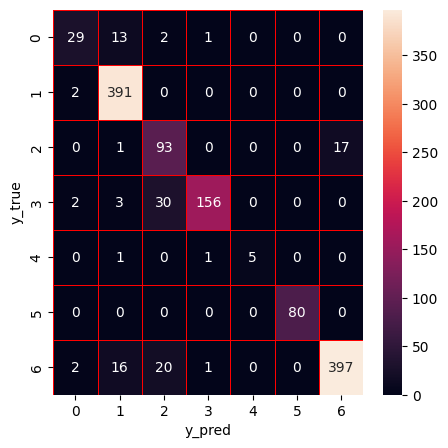


Training Time: 0.01 seconds		Prediction Time: 0.0034 seconds		Testing Time: 0.36 seconds


In [24]:
# Start recording training time
start_time = time.time()

# Creating a Gaussian Naive Bayes classifier
gnb_classifier = GaussianNB()

# Instructing the Gaussian Naive Bayes model to learn from the provided training data
gnb_classifier.fit(X_train, y_train)

# Stop recording training time
end_time = time.time()

# Calculating the training time in seconds
training_time = end_time - start_time

# Start recording testing time
start_time = time.time()

# Calculating accuracy of Gaussian Naive Bayes Classifier
gnb_score = gnb_classifier.score(X_test, y_test)

# Use the trained Gaussian Naive Bayes Classifier to make predictions on the test data (X_test), and the predictions are stored in the y_predict_gnb variable.
# Simultaneously, calculating prediction time
# Start recording prediction time
start_time = time.time()
y_predict_gnb = gnb_classifier.predict(X_test)
# Stop recording prediction time
end_time = time.time()
# Calculating the prediction time in seconds
prediction_time = end_time - start_time

# Copying y_test in y_true_gnb variable for comparison and evaluation purposes.
y_true_gnb = y_test

# Calculating several important classification evaluation metrics, including precision, recall, F1-score, and support.
precision_gnb, recall_gnb, fscore_gnb, support_gnb = precision_recall_fscore_support(y_true_gnb, y_predict_gnb, average='weighted')

print('Accuracy of Gaussian Naive Bayes classifier: ' + str(gnb_score))
print('Precision of Gaussian Naive Bayes classifier: ' + str(precision_gnb))
print('Recall of Gaussian Naive Bayes classifier: ' + str(recall_gnb))
print('F1-score of Gaussian Naive Bayes classifier: ' + str(fscore_gnb))
print(classification_report(y_true_gnb, y_predict_gnb))

# This snippet of code is used to create a heatmap of a confusion matrix
cm_gnb = confusion_matrix(y_true_gnb, y_predict_gnb)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm_gnb, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

# Stop recording testing time
end_time = time.time()

# Calculating the testing time in seconds
testing_time = end_time - start_time

print()
print(f"Training Time: {training_time:.2f} seconds\t\tPrediction Time: {prediction_time:.4f} seconds\t\tTesting Time: {testing_time:.2f} seconds")


Accuracy of Gradient Boosting classifier: 0.9904988123515439
Precision of Gradient Boosting classifier: 0.9906246906101897
Recall of Gradient Boosting classifier: 0.9904988123515439
F1-score of Gradient Boosting classifier: 0.9904148161709238
              precision    recall  f1-score   support

           0       0.87      0.89      0.88        45
           1       1.00      0.99      1.00       393
           2       1.00      1.00      1.00       111
           3       0.99      0.99      0.99       191
           4       1.00      0.71      0.83         7
           5       1.00      0.99      0.99        80
           6       0.99      1.00      1.00       436

    accuracy                           0.99      1263
   macro avg       0.98      0.94      0.96      1263
weighted avg       0.99      0.99      0.99      1263



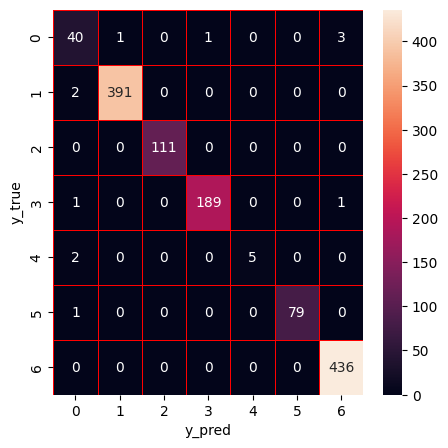


Training Time: 49.55 seconds		Prediction Time: 0.0137 seconds		Testing Time: 0.39 seconds


In [25]:
# Start recording training time
start_time = time.time()

# Create a Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier()

# Instructing the Gradient Boosting model to learn from the provided training data
gb_classifier.fit(X_train, y_train)

# Stop recording training time
end_time = time.time()

# Calculating the training time in seconds
training_time = end_time - start_time

# Start recording testing time
start_time = time.time()

# Calculating accuracy of Gradient Boosting Classifier
gb_score = gb_classifier.score(X_test, y_test)

# Use the trained Gradient Boosting Classifier to make predictions on the test data (X_test), and the predictions are stored in the y_predict_gb variable.
# Simultaneously, calculating prediction time
# Start recording prediction time
start_time = time.time()
y_predict_gb = gb_classifier.predict(X_test)
# Stop recording prediction time
end_time = time.time()
# Calculating the prediction time in seconds
prediction_time = end_time - start_time

# Copying y_test in y_true_gb variable for comparison and evaluation purposes.
y_true_gb = y_test

# Calculating several important classification evaluation metrics, including precision, recall, F1-score, and support.
precision_gb, recall_gb, fscore_gb, support_gb = precision_recall_fscore_support(y_true_gb, y_predict_gb, average='weighted')

print('Accuracy of Gradient Boosting classifier: ' + str(gb_score))
print('Precision of Gradient Boosting classifier: ' + str(precision_gb))
print('Recall of Gradient Boosting classifier: ' + str(recall_gb))
print('F1-score of Gradient Boosting classifier: ' + str(fscore_gb))
print(classification_report(y_true_gb, y_predict_gb))

# This snippet of code is used to create a heatmap of a confusion matrix
cm_gb = confusion_matrix(y_true_gb, y_predict_gb)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm_gb, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

# Stop recording testing time
end_time = time.time()

# Calculating the testing time in seconds
testing_time = end_time - start_time

print()
print(f"Training Time: {training_time:.2f} seconds\t\tPrediction Time: {prediction_time:.4f} seconds\t\tTesting Time: {testing_time:.2f} seconds")


Accuracy of K-Nearest Neighbors (KNN): 0.9778305621536025
Precision of K-Nearest Neighbors (KNN): 0.9776531772214465
Recall of K-Nearest Neighbors (KNN): 0.9778305621536025
F1-score of K-Nearest Neighbors (KNN): 0.9773448584106852
              precision    recall  f1-score   support

           0       0.94      0.76      0.84        45
           1       0.99      0.99      0.99       393
           2       0.94      0.95      0.95       111
           3       0.99      0.98      0.99       191
           4       0.86      0.86      0.86         7
           5       1.00      1.00      1.00        80
           6       0.98      0.99      0.98       436

    accuracy                           0.98      1263
   macro avg       0.96      0.93      0.94      1263
weighted avg       0.98      0.98      0.98      1263



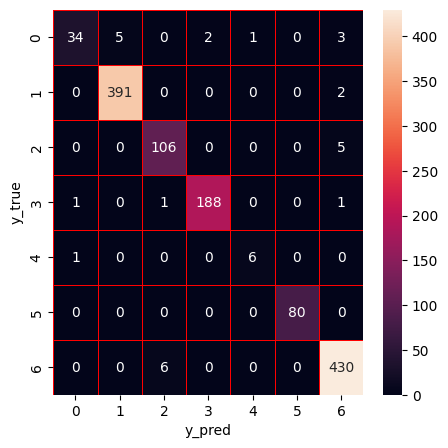


Training Time: 0.00 seconds		Prediction Time: 0.1381 seconds		Testing Time: 0.65 seconds


In [26]:
# Start recording training time
start_time = time.time()

# Create a K-Nearest Neighbors (KNN) classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can specify the number of neighbors and other hyperparameters as needed

# instructing K-Nearest Neighbors (KNN) model to learn from the provided training data
knn_classifier.fit(X_train, y_train)

# Stop recording training time
end_time = time.time()

# Calculating the training time in seconds
training_time = end_time - start_time

#-----------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Start recording testing time
start_time = time.time()

# Calculating accuracy of K-Nearest Neighbors (KNN) Classifier
knn_score = knn_classifier.score(X_test, y_test)

# Use the trained K-Nearest Neighbors (KNN) classifier to make predictions on the test data (X_test), and the predictions are stored in the y_predict_knn variable.
# Simultaneouly Calculating prediction time
# Start recording prediction time
start_time = time.time()
y_predict_knn = knn_classifier.predict(X_test)
# Stop recording training time
end_time = time.time()
# Calculating the prediction time in seconds
prediction_time = end_time - start_time

# Copying y_test in y_true_knn variable for comparison and evaluation purposes.
y_true_knn = y_test

# Calculating several important classification evaluation metrics, including precision, recall, F1-score, and support.
precision_knn, recall_knn, fscore_knn, support_knn = precision_recall_fscore_support(y_true_knn, y_predict_knn, average='weighted')

print('Accuracy of K-Nearest Neighbors (KNN): ' + str(knn_score))
print('Precision of K-Nearest Neighbors (KNN): ' + str(precision_knn))
print('Recall of K-Nearest Neighbors (KNN): ' + str(recall_knn))
print('F1-score of K-Nearest Neighbors (KNN): ' + str(fscore_knn))
print(classification_report(y_true_knn, y_predict_knn))

# This snippet of code is used to create a heatmap of a confusion matrix
cm_knn = confusion_matrix(y_true_knn, y_predict_knn)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm_knn, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

# Stop recording testing time
end_time = time.time()

# Calculating the testing time in seconds
testing_time = end_time - start_time

print()
print(f"Training Time: {training_time:.2f} seconds\t\tPrediction Time: {prediction_time:.4f} seconds\t\tTesting Time: {testing_time:.2f} seconds")


Accuracy of OvO Logistic Regression classifier: 0.9073634204275535
Precision of OvO Logistic Regression classifier: 0.9120407552775578
Recall of OvO Logistic Regression classifier: 0.9073634204275535
F1-score of OvO Logistic Regression classifier: 0.900385454224783
              precision    recall  f1-score   support

           0       1.00      0.47      0.64        45
           1       0.90      0.98      0.94       393
           2       0.84      0.77      0.81       111
           3       0.90      0.98      0.94       191
           4       0.67      0.86      0.75         7
           5       1.00      0.53      0.69        80
           6       0.93      0.95      0.94       436

    accuracy                           0.91      1263
   macro avg       0.89      0.79      0.81      1263
weighted avg       0.91      0.91      0.90      1263



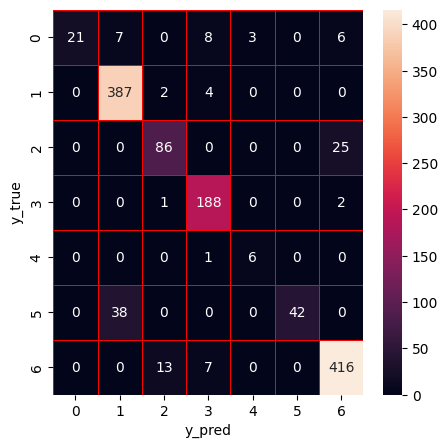


Training Time: 0.56 seconds		Prediction Time: 0.0009 seconds		Testing Time: 0.40 seconds


In [27]:
# Start recording training time
start_time = time.time()

# Creating a Logistic Regression classifier with the One-Versus-One (OvO) strategy
ovo_classifier = LogisticRegression(multi_class='multinomial', solver='lbfgs')

# Instructing the OvO model to learn from the provided training data
ovo_classifier.fit(X_train, y_train)

# Stop recording training time
end_time = time.time()

# Calculating the training time in seconds
training_time = end_time - start_time

# Start recording testing time
start_time = time.time()

# Calculating accuracy of OvO Logistic Regression Classifier
ovo_score = ovo_classifier.score(X_test, y_test)

# Use the trained OvO Logistic Regression Classifier to make predictions on the test data (X_test), and the predictions are stored in the y_predict_ovo variable.
# Simultaneously, calculating prediction time
# Start recording prediction time
start_time = time.time()
y_predict_ovo = ovo_classifier.predict(X_test)
# Stop recording prediction time
end_time = time.time()
# Calculating the prediction time in seconds
prediction_time = end_time - start_time

# Copying y_test in y_true_ovo variable for comparison and evaluation purposes.
y_true_ovo = y_test

# Calculating several important classification evaluation metrics, including precision, recall, F1-score, and support.
precision_ovo, recall_ovo, fscore_ovo, support_ovo = precision_recall_fscore_support(y_true_ovo, y_predict_ovo, average='weighted')

print('Accuracy of OvO Logistic Regression classifier: ' + str(ovo_score))
print('Precision of OvO Logistic Regression classifier: ' + str(precision_ovo))
print('Recall of OvO Logistic Regression classifier: ' + str(recall_ovo))
print('F1-score of OvO Logistic Regression classifier: ' + str(fscore_ovo))
print(classification_report(y_true_ovo, y_predict_ovo))

# This snippet of code is used to create a heatmap of a confusion matrix
cm_ovo = confusion_matrix(y_true_ovo, y_predict_ovo)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm_ovo, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

# Stop recording testing time
end_time = time.time()

# Calculating the testing time in seconds
testing_time = end_time - start_time

print()
print(f"Training Time: {training_time:.2f} seconds\t\tPrediction Time: {prediction_time:.4f} seconds\t\tTesting Time: {testing_time:.2f} seconds")


Accuracy of OvR Logistic Regression classifier: 0.9049881235154394
Precision of OvR Logistic Regression classifier: 0.9095896313395256
Recall of OvR Logistic Regression classifier: 0.9049881235154394
F1-score of OvR Logistic Regression classifier: 0.8976477185408417
              precision    recall  f1-score   support

           0       1.00      0.44      0.62        45
           1       0.90      0.98      0.94       393
           2       0.84      0.77      0.81       111
           3       0.90      0.98      0.94       191
           4       0.75      0.86      0.80         7
           5       1.00      0.53      0.69        80
           6       0.92      0.95      0.94       436

    accuracy                           0.90      1263
   macro avg       0.90      0.79      0.82      1263
weighted avg       0.91      0.90      0.90      1263



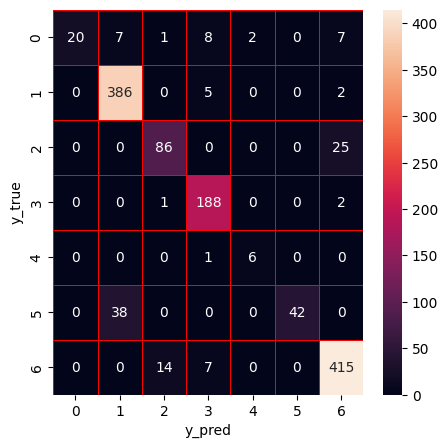


Training Time: 0.50 seconds		Prediction Time: 0.0008 seconds		Testing Time: 0.39 seconds


In [28]:
# Start recording training time
start_time = time.time()

# Creating a Logistic Regression classifier with the One-Versus-Rest (OvR) strategy
ovr_classifier = LogisticRegression(multi_class='ovr')

# Instructing the OvR model to learn from the provided training data
ovr_classifier.fit(X_train, y_train)

# Stop recording training time
end_time = time.time()

# Calculating the training time in seconds
training_time = end_time - start_time

# Start recording testing time
start_time = time.time()

# Calculating accuracy of OvR Logistic Regression Classifier
ovr_score = ovr_classifier.score(X_test, y_test)

# Use the trained OvR Logistic Regression Classifier to make predictions on the test data (X_test), and the predictions are stored in the y_predict_ovr variable.
# Simultaneously, calculating prediction time
# Start recording prediction time
start_time = time.time()
y_predict_ovr = ovr_classifier.predict(X_test)
# Stop recording prediction time
end_time = time.time()
# Calculating the prediction time in seconds
prediction_time = end_time - start_time

# Copying y_test in y_true_ovr variable for comparison and evaluation purposes.
y_true_ovr = y_test

# Calculating several important classification evaluation metrics, including precision, recall, F1-score, and support.
precision_ovr, recall_ovr, fscore_ovr, support_ovr = precision_recall_fscore_support(y_true_ovr, y_predict_ovr, average='weighted')

print('Accuracy of OvR Logistic Regression classifier: ' + str(ovr_score))
print('Precision of OvR Logistic Regression classifier: ' + str(precision_ovr))
print('Recall of OvR Logistic Regression classifier: ' + str(recall_ovr))
print('F1-score of OvR Logistic Regression classifier: ' + str(fscore_ovr))
print(classification_report(y_true_ovr, y_predict_ovr))

# This snippet of code is used to create a heatmap of a confusion matrix
cm_ovr = confusion_matrix(y_true_ovr, y_predict_ovr)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm_ovr, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

# Stop recording testing time
end_time = time.time()

# Calculating the testing time in seconds
testing_time = end_time - start_time

print()
print(f"Training Time: {training_time:.2f} seconds\t\tPrediction Time: {prediction_time:.4f} seconds\t\tTesting Time: {testing_time:.2f} seconds")


Accuracy of ML_Perceptron: 0.9738717339667459
Precision of ML_Perceptron: 0.9743211943899452
Recall of ML_Perceptron: 0.9738717339667459
F1-score of ML_Perceptron: 0.9735418936213809
              precision    recall  f1-score   support

           0       0.97      0.78      0.86        45
           1       0.99      0.99      0.99       393
           2       0.91      0.95      0.93       111
           3       0.95      0.99      0.97       191
           4       1.00      0.86      0.92         7
           5       1.00      1.00      1.00        80
           6       0.98      0.97      0.98       436

    accuracy                           0.97      1263
   macro avg       0.97      0.93      0.95      1263
weighted avg       0.97      0.97      0.97      1263



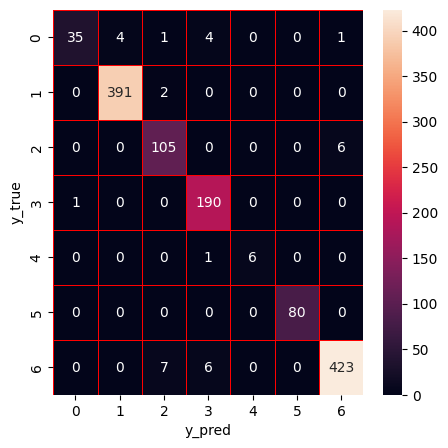


Training Time: 15.70 seconds		Prediction Time: 0.0026 seconds		Testing Time: 0.40 seconds


In [29]:
# Start recording training time
start_time = time.time()

# Creating an Multilayer Perceptoron classifier
mlp_classifier = MLPClassifier()

# Instructing the ML_Perceptron model to learn from the provided training data
mlp_classifier.fit(X_train, y_train)

# Stop recording training time
end_time = time.time()

# Calculating the training time in seconds
training_time = end_time - start_time

# Start recording testing time
start_time = time.time()

# Calculating accuracy of MLP Classifier
mlp_score = mlp_classifier.score(X_test, y_test)

# Use the trained MLP Classifier to make predictions on the test data (X_test), and the predictions are stored in the y_predict_mlp variable.
# Simultaneously, calculating prediction time
# Start recording prediction time
start_time = time.time()
y_predict_mlp = mlp_classifier.predict(X_test)
# Stop recording prediction time
end_time = time.time()
# Calculating the prediction time in seconds
prediction_time = end_time - start_time

# Copying y_test in y_true_mlp variable for comparison and evaluation purposes.
y_true_mlp = y_test

# Calculating several important classification evaluation metrics, including precision, recall, F1-score, and support.
precision_mlp, recall_mlp, fscore_mlp, support_mlp = precision_recall_fscore_support(y_true_mlp, y_predict_mlp, average='weighted')

print('Accuracy of ML_Perceptron: ' + str(mlp_score))
print('Precision of ML_Perceptron: ' + str(precision_mlp))
print('Recall of ML_Perceptron: ' + str(recall_mlp))
print('F1-score of ML_Perceptron: ' + str(fscore_mlp))
print(classification_report(y_true_mlp, y_predict_mlp))

# This snippet of code is used to create a heatmap of a confusion matrix
cm_mlp = confusion_matrix(y_true_mlp, y_predict_mlp)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm_mlp, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

# Stop recording testing time
end_time = time.time()

# Calculating the testing time in seconds
testing_time = end_time - start_time

print()
print(f"Training Time: {training_time:.2f} seconds\t\tPrediction Time: {prediction_time:.4f} seconds\t\tTesting Time: {testing_time:.2f} seconds")


Accuracy of Multinomial Naive Bayes classifier: 0.5811559778305622
Precision of Multinomial Naive Bayes classifier: 0.5701578001156697
Recall of Multinomial Naive Bayes classifier: 0.5811559778305622
F1-score of Multinomial Naive Bayes classifier: 0.5419250164440603
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        45
           1       0.49      0.42      0.45       393
           2       0.95      0.33      0.49       111
           3       0.96      0.68      0.80       191
           4       0.19      0.71      0.29         7
           5       0.00      0.00      0.00        80
           6       0.55      0.91      0.69       436

    accuracy                           0.58      1263
   macro avg       0.45      0.44      0.39      1263
weighted avg       0.57      0.58      0.54      1263



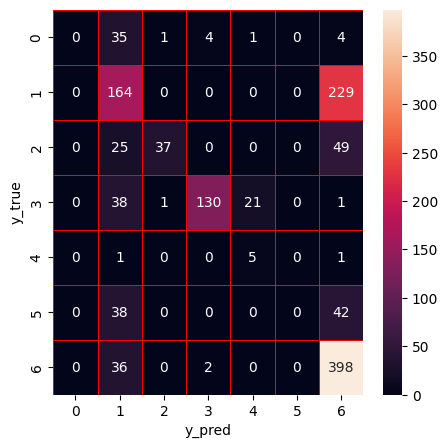


Training Time: 0.01 seconds		Prediction Time: 0.0009 seconds		Testing Time: 0.39 seconds


In [30]:
# Start recording training time
start_time = time.time()

# Creating a Multinomial Naive Bayes classifier
multinomial_classifier = MultinomialNB()

# Instructing the Multinomial Naive Bayes model to learn from the provided training data
multinomial_classifier.fit(X_train, y_train)

# Stop recording training time
end_time = time.time()

# Calculating the training time in seconds
training_time = end_time - start_time

# Start recording testing time
start_time = time.time()

# Calculating accuracy of Multinomial Naive Bayes Classifier
multinomial_score = multinomial_classifier.score(X_test, y_test)

# Use the trained Multinomial Naive Bayes Classifier to make predictions on the test data (X_test), and the predictions are stored in the y_predict_multinomial variable.
# Simultaneously, calculating prediction time
# Start recording prediction time
start_time = time.time()
y_predict_multinomial = multinomial_classifier.predict(X_test)
# Stop recording prediction time
end_time = time.time()
# Calculating the prediction time in seconds
prediction_time = end_time - start_time

# Copying y_test in y_true_multinomial variable for comparison and evaluation purposes.
y_true_multinomial = y_test

# Calculating several important classification evaluation metrics, including precision, recall, F1-score, and support.
precision_multinomial, recall_multinomial, fscore_multinomial, support_multinomial = precision_recall_fscore_support(y_true_multinomial, y_predict_multinomial, average='weighted')

print('Accuracy of Multinomial Naive Bayes classifier: ' + str(multinomial_score))
print('Precision of Multinomial Naive Bayes classifier: ' + str(precision_multinomial))
print('Recall of Multinomial Naive Bayes classifier: ' + str(recall_multinomial))
print('F1-score of Multinomial Naive Bayes classifier: ' + str(fscore_multinomial))
print(classification_report(y_true_multinomial, y_predict_multinomial))

# This snippet of code is used to create a heatmap of a confusion matrix
cm_multinomial = confusion_matrix(y_true_multinomial, y_predict_multinomial)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm_multinomial, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

# Stop recording testing time
end_time = time.time()

# Calculating the testing time in seconds
testing_time = end_time - start_time

print()
print(f"Training Time: {training_time:.2f} seconds\t\tPrediction Time: {prediction_time:.4f} seconds\t\tTesting Time: {testing_time:.2f} seconds")


Accuracy of Passive Aggressive Classifier: 0.9247822644497229
Precision of Passive Aggressive Classifier: 0.9311079302266253
Recall of Passive Aggressive Classifier: 0.9247822644497229
F1-score of Passive Aggressive Classifier: 0.9214773503432904
              precision    recall  f1-score   support

           0       0.89      0.56      0.68        45
           1       0.91      0.99      0.95       393
           2       0.77      1.00      0.87       111
           3       0.93      0.99      0.96       191
           4       1.00      0.57      0.73         7
           5       0.96      0.61      0.75        80
           6       0.99      0.92      0.95       436

    accuracy                           0.92      1263
   macro avg       0.92      0.81      0.84      1263
weighted avg       0.93      0.92      0.92      1263



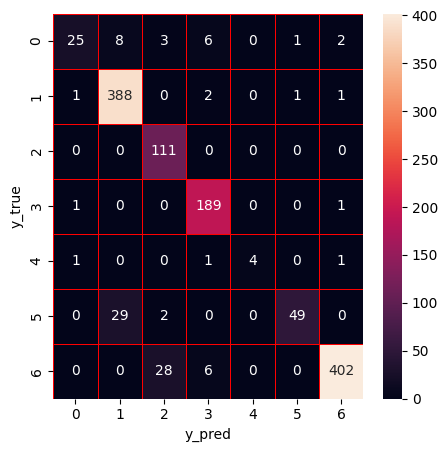


Training Time: 0.38 seconds		Prediction Time: 0.0009 seconds		Testing Time: 0.40 seconds


In [31]:
# Start recording training time
start_time = time.time()

# Creating a Passive Aggressive Classifier
pac_classifier = PassiveAggressiveClassifier()

# Instructing Passive Aggressive model to learn from the provided training data
pac_classifier.fit(X_train, y_train)

# Stop recording training time
end_time = time.time()

# Calculating the training time in seconds
training_time = end_time - start_time

#-----------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Start recording testing time
start_time = time.time()

# Calculating accuracy of Passive Aggressive Classifier
pac_score = pac_classifier.score(X_test, y_test)

# Use the trained Passive Aggressive Classifier to make predictions on the test data (X_test), and the predictions are stored in the y_predict_pac variable.
# Simultaneouly Calculating prediction time
# Start recording prediction time
start_time = time.time()
y_predict_pac = pac_classifier.predict(X_test)
# Stop recording training time
end_time = time.time()
# Calculating the prediction time in seconds
prediction_time = end_time - start_time

# Copying y_test in y_true_pac variable for comparison and evaluation purposes.
y_true_pac = y_test

# Calculating several important classification evaluation metrics, including precision, recall, F1-score, and support.
precision_pac, recall_pac, fscore_pac, support_pac = precision_recall_fscore_support(y_true_pac, y_predict_pac, average='weighted')

print('Accuracy of Passive Aggressive Classifier: ' + str(pac_score))
print('Precision of Passive Aggressive Classifier: ' + str(precision_pac))
print('Recall of Passive Aggressive Classifier: ' + str(recall_pac))
print('F1-score of Passive Aggressive Classifier: ' + str(fscore_pac))
print(classification_report(y_true_pac, y_predict_pac))

# This snippet of code is used to create a heatmap of a confusion matrix
cm_pac = confusion_matrix(y_true_pac, y_predict_pac)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm_pac, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

# Stop recording testing time
end_time = time.time()

# Calculating the testing time in seconds
testing_time = end_time - start_time

print()
print(f"Training Time: {training_time:.2f} seconds\t\tPrediction Time: {prediction_time:.4f} seconds\t\tTesting Time: {testing_time:.2f} seconds")


Accuracy of Random Forest: 0.9889152810768013
Precision of Random Forest: 0.988880989783149
Recall of Random Forest: 0.9889152810768013
F1-score of Random Forest: 0.9887450911178873
              precision    recall  f1-score   support

           0       0.89      0.87      0.88        45
           1       1.00      0.99      1.00       393
           2       0.98      1.00      0.99       111
           3       0.99      0.98      0.99       191
           4       1.00      0.71      0.83         7
           5       1.00      1.00      1.00        80
           6       0.99      1.00      0.99       436

    accuracy                           0.99      1263
   macro avg       0.98      0.94      0.95      1263
weighted avg       0.99      0.99      0.99      1263



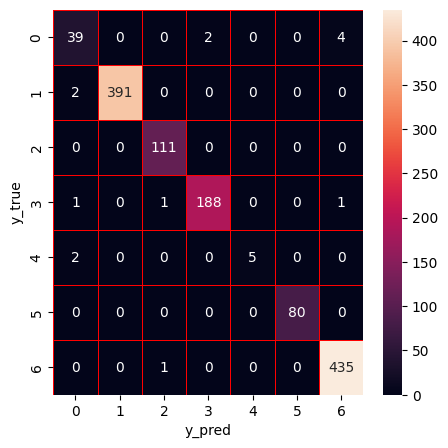


Training Time: 1.05 seconds		Prediction Time: 0.0216 seconds		Testing Time: 0.40 seconds


In [32]:
# Start recording training time
start_time = time.time()

# Taining Random Forest
rf = RandomForestClassifier(random_state = 0)

# instructing Random Forest model to learn from the provided training data
rf.fit(X_train, y_train)

# Stop recording training time
end_time = time.time()

# Calculating the training time in seconds
training_time = end_time - start_time

#-----------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Start recording testing time
start_time = time.time()

# Calculating accuracy of Random Forest
rf_score = rf.score(X_test, y_test)

# Use the trained Random Forest to make predictions on the test data (X_test), and the predictions are stored in the y_predict_rf variable.
# Simultaneouly Calculating prediction time
# Start recording prediction time
start_time = time.time()
y_predict_rf = rf.predict(X_test)
# Stop recording training time
end_time = time.time()
# Calculating the prediction time in seconds
prediction_time = end_time - start_time

# Copying y_test in y_true_rf variable for comparison and evaluation purposes.
y_true_rf = y_test

# Calculating several important classification evaluation metrics, including precision, recall, F1-score, and support.
precision_rf, recall_rf, fscore_rf, support_rf = precision_recall_fscore_support(y_true_rf, y_predict_rf, average='weighted')

print('Accuracy of Random Forest: ' + str(rf_score))
print('Precision of Random Forest: ' + str(precision_rf))
print('Recall of Random Forest: ' + str(recall_rf))
print('F1-score of Random Forest: ' + str(fscore_rf))
print(classification_report(y_true_rf, y_predict_rf))

# This snippet of code is used to create a heatmap of a confusion matrix
cm_rf = confusion_matrix(y_true_rf, y_predict_rf)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm_rf, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

# Stop recording testing time
end_time = time.time()

# Calculating the testing time in seconds
testing_time = end_time - start_time

print()
print(f"Training Time: {training_time:.2f} seconds\t\tPrediction Time: {prediction_time:.4f} seconds\t\tTesting Time: {testing_time:.2f} seconds")


Accuracy of Ridge Classifier: 0.8471892319873318
Precision of Ridge Classifier: 0.8519544127937937
Recall of Ridge Classifier: 0.8471892319873318
F1-score of Ridge Classifier: 0.8242871842027235
              precision    recall  f1-score   support

           0       1.00      0.44      0.62        45
           1       0.79      0.98      0.87       393
           2       0.59      0.77      0.67       111
           3       0.91      0.98      0.94       191
           4       0.83      0.71      0.77         7
           5       0.60      0.04      0.07        80
           6       0.98      0.88      0.93       436

    accuracy                           0.85      1263
   macro avg       0.81      0.69      0.70      1263
weighted avg       0.85      0.85      0.82      1263



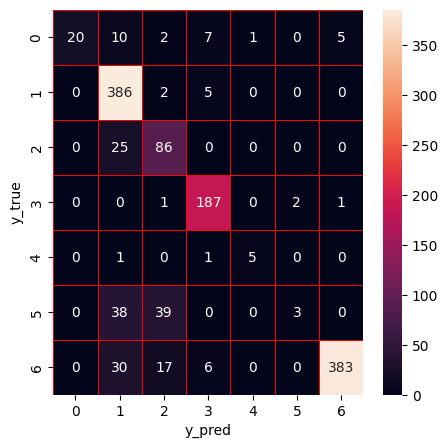


Training Time: 0.04 seconds		Prediction Time: 0.0011 seconds		Testing Time: 0.64 seconds


In [33]:
# Start recording training time
start_time = time.time()

# Creating a Ridge Classifier
ridge_classifier = RidgeClassifier()

# Instructing Ridge model to learn from the provided training data
ridge_classifier.fit(X_train, y_train)

# Stop recording training time
end_time = time.time()

# Calculating the training time in seconds
training_time = end_time - start_time

#-----------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Start recording testing time
start_time = time.time()

# Calculating accuracy of Ridge Classifier
ridge_score = ridge_classifier.score(X_test, y_test)

# Use the trained Ridge Classifier to make predictions on the test data (X_test), and the predictions are stored in the y_predict_ridge variable.
# Simultaneouly Calculating prediction time
# Start recording prediction time
start_time = time.time()
y_predict_ridge = ridge_classifier.predict(X_test)
# Stop recording training time
end_time = time.time()
# Calculate the prediction time in seconds
prediction_time = end_time - start_time

# Copying y_test in y_true_ridge variable for comparison and evaluation purposes.
y_true_ridge = y_test

# Calculating several important classification evaluation metrics, including precision, recall, F1-score, and support.
precision_ridge, recall_ridge, fscore_ridge, support_ridge = precision_recall_fscore_support(y_true_ridge, y_predict_ridge, average='weighted')

print('Accuracy of Ridge Classifier: ' + str(ridge_score))
print('Precision of Ridge Classifier: ' + str(precision_ridge))
print('Recall of Ridge Classifier: ' + str(recall_ridge))
print('F1-score of Ridge Classifier: ' + str(fscore_ridge))
print(classification_report(y_true_ridge, y_predict_ridge))

# This snippet of code is used to create a heatmap of a confusion matrix
cm_ridge = confusion_matrix(y_true_ridge, y_predict_ridge)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm_ridge, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

# Stop recording testing time
end_time = time.time()

# Calculating the testing time in seconds
testing_time = end_time - start_time

print()
print(f"Training Time: {training_time:.2f} seconds\t\tPrediction Time: {prediction_time:.4f} seconds\t\tTesting Time: {testing_time:.2f} seconds")


Accuracy of SVM classifier: 0.9136975455265242
Precision of SVM classifier: 0.9167202483233968
Recall of SVM classifier: 0.9136975455265242
F1-score of SVM classifier: 0.9080767911487478
              precision    recall  f1-score   support

           0       1.00      0.60      0.75        45
           1       0.90      0.98      0.94       393
           2       0.83      0.77      0.80       111
           3       0.91      0.99      0.95       191
           4       1.00      0.86      0.92         7
           5       0.98      0.53      0.68        80
           6       0.94      0.96      0.95       436

    accuracy                           0.91      1263
   macro avg       0.94      0.81      0.86      1263
weighted avg       0.92      0.91      0.91      1263



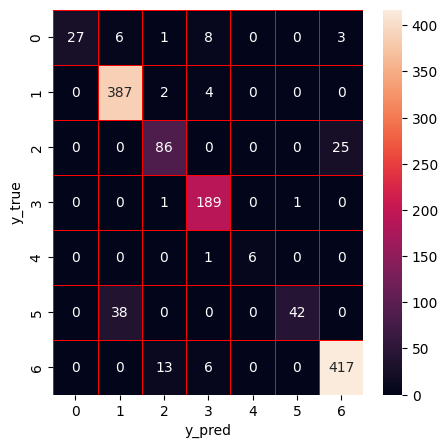


Training Time: 0.56 seconds		Prediction Time: 0.2367 seconds		Testing Time: 0.66 seconds


In [34]:
# Start recording training time
start_time = time.time()

# Creating an SVM classifier
svm_classifier = SVC()

# Instructing SVM model to learn from the provided training data
svm_classifier.fit(X_train, y_train)

# Stop recording training time
end_time = time.time()

# Calculating the training time in seconds
training_time = end_time - start_time

#-----------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Start recording testing time
start_time = time.time()

# Calculating accuracy of SVM Classifier
svm_score = svm_classifier.score(X_test, y_test)

# Use the trained SVM Classifier to make predictions on the test data (X_test), and the predictions are stored in the y_predict_svm variable.
# Simultaneouly Calculating prediction time
# Start recording prediction time
start_time = time.time()
y_predict_svm = svm_classifier.predict(X_test)
# Stop recording training time
end_time = time.time()
# Calculating the prediction time in seconds
prediction_time = end_time - start_time

# Copying y_test in y_true_svm variable for comparison and evaluation purposes.
y_true_svm = y_test

# Calculating several important classification evaluation metrics, including precision, recall, F1-score, and support.
precision_svm, recall_svm, fscore_svm, support_svm = precision_recall_fscore_support(y_true_svm, y_predict_svm, average='weighted')

print('Accuracy of SVM classifier: ' + str(svm_score))
print('Precision of SVM classifier: ' + str(precision_svm))
print('Recall of SVM classifier: ' + str(recall_svm))
print('F1-score of SVM classifier: ' + str(fscore_svm))
print(classification_report(y_true_svm, y_predict_svm))

# This snippet of code is used to create a heatmap of a confusion matrix
cm_svm = confusion_matrix(y_true_svm, y_predict_svm)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm_svm, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

# Stop recording testing time
end_time = time.time()

# Calculating the testing time in seconds
testing_time = end_time - start_time

print()
print(f"Training Time: {training_time:.2f} seconds\t\tPrediction Time: {prediction_time:.4f} seconds\t\tTesting Time: {testing_time:.2f} seconds")


Accuracy of XGboost: 0.9881235154394299
Precision of XGboost: 0.9882818698160075
Recall of XGboost: 0.9881235154394299
F1-score of XGboost: 0.9880439368305187
              precision    recall  f1-score   support

           0       0.87      0.89      0.88        45
           1       1.00      0.99      1.00       393
           2       0.98      1.00      0.99       111
           3       0.99      0.99      0.99       191
           4       1.00      0.71      0.83         7
           5       1.00      0.97      0.99        80
           6       0.99      1.00      0.99       436

    accuracy                           0.99      1263
   macro avg       0.98      0.94      0.95      1263
weighted avg       0.99      0.99      0.99      1263



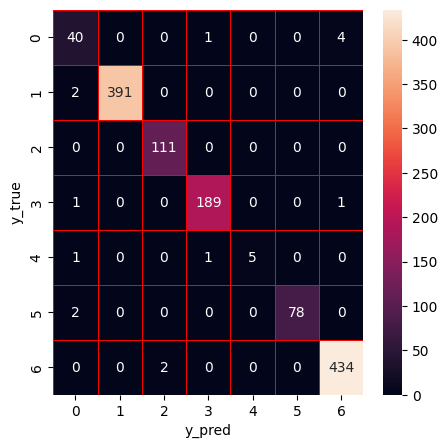


Training Time: 0.42 seconds		Prediction Time: 0.0028 seconds		Testing Time: 0.39 seconds


In [35]:
# Start recording training time
start_time = time.time()

# Training XGboost
xg = xgb.XGBClassifier(n_estimators = 10)

# Instructing XGboost model to learn from the provided training data
xg.fit(X_train, y_train)

# Stop recording training time
end_time = time.time()

# Calculate the training time in seconds
training_time = end_time - start_time

#-----------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Start recording testing time
start_time = time.time()

# Calculating accuracy of XGboost Classifier
xg_score = xg.score(X_test, y_test)

# Use the trained XGboost Classifier to make predictions on the test data (X_test), and the predictions are stored in the y_predict_xg variable.
# Simultaneouly Calculating prediction time
# Start recording prediction time
start_time = time.time()
y_predict_xg = xg.predict(X_test)
# Stop recording training time
end_time = time.time()
# Calculating the prediction time in seconds
prediction_time = end_time - start_time

# Copying y_test in y_true_xg variable for comparison and evaluation purposes.
y_true_xg = y_test

# Calculating several important classification evaluation metrics, including precision, recall, F1-score, and support.
precision_xg, recall_xg, fscore_xg, support_xg = precision_recall_fscore_support(y_true_xg, y_predict_xg, average='weighted')

print('Accuracy of XGboost: ' + str(xg_score))
print('Precision of XGboost: ' + str(precision_xg))
print('Recall of XGboost: ' + str(recall_xg))
print('F1-score of XGboost: ' + str(fscore_xg))
print(classification_report(y_true_xg, y_predict_xg))

# This snippet of code is used to create a heatmap of a confusion matrix
cm_xg = confusion_matrix(y_true_xg, y_predict_xg)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm_xg, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

# Stop recording testing time
end_time = time.time()

# Calculating the testing time in seconds
testing_time = end_time - start_time

print()
print(f"Training Time: {training_time:.2f} seconds\t\tPrediction Time: {prediction_time:.4f} seconds\t\tTesting Time: {testing_time:.2f} seconds")


In [36]:
print("Happy :)")


Happy :)
